<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Project Title: Arabic Sentiment Reviews</p></b></h1>

### Tabel of Contents:

* [Import Libraries](#1)
* [Load Dataset](#2)
* [Preprocessing](#3)
* [ML Models](#4)
* [Like this? Upvote and comment! 🌊 End](#6)

**<a id="1"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Import Libraries</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [1]:
from tqdm import tqdm
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import cross_val_score,GridSearchCV
import pickle
# Models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

**<a id="2"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Load Dataset</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [2]:
dataset = pd.read_csv('/kaggle/input/chatgpt-user-reviews/CHATGPT.csv')
dataset.head()

,Review,label
0,up to this point i ’ ve mostly been using chat...,NEGATIVE
1,i ’ ve been a user since it ’ s initial roll o...,NEGATIVE
2,this app would almost be perfect if it wasn ’ ...,NEGATIVE
3,"i recently downloaded the app and overall, it'...",POSITIVE
4,i appreciate the devs implementing siri suppor...,NEGATIVE


In [3]:
dataset.shape

(2292, 2)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2292 entries, 0 to 2291
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  2249 non-null   object
 1   label   2292 non-null   object
dtypes: object(2)
memory usage: 35.9+ KB


In [5]:
dataset.isna().sum()

Review    43
label      0
dtype: int64

In [6]:
dataset.dropna(inplace=True)

In [7]:
dataset.label.value_counts()

label
NEGATIVE    1263
POSITIVE     986
Name: count, dtype: int64

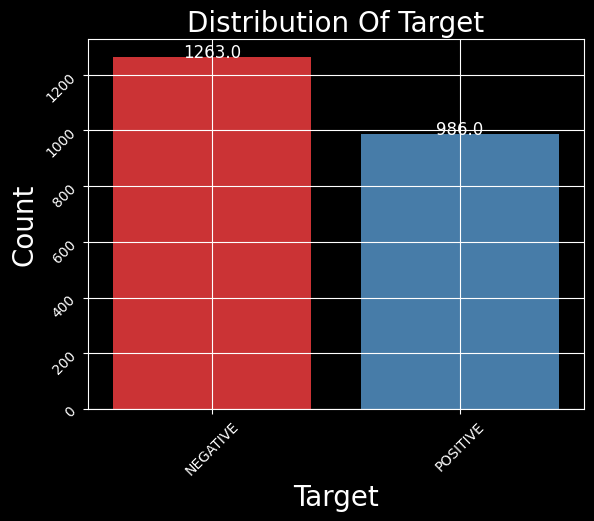

In [8]:
plt.style.use('dark_background')
ax = sns.countplot(x='label', data=dataset, palette='Set1')
plt.title('Distribution Of Target', fontsize=20)
plt.xlabel('Target', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12)
plt.show()

**<a id="3"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Preprocessing</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [9]:
def clean_text(text):
    # Remove non-alphanumeric characters and extra whitespace
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert multiple whitespace characters to a single space
    text = re.sub(r'\s+', ' ', text)
    # Convert the text to lowercase
    text = text.lower()
    return text

In [10]:
dataset.label[50],dataset.Review[50]

('POSITIVE',
 'i ’ m pleased with my mobile chatgpt experience so far. it feels even more conversational and almost like a messages chat. i also like that you can search through all your previous chats. and using whisper to prompt gpt already feels like one half of a supercharged siri / alexa experience. however, i ’ d love to be able to enable beta features as a plus user. as far as i can tell from exploring the app, there isn ’ t a direct way to enable browsing or plugins yet. i have been able to start a chat with browser / plugins on web and then continue in app with the same capabilities. anyways, i know we ’ re only a day in. excited to see all the possible new ways to interface with agents!')

In [11]:
dataset.label[50],clean_text(dataset.Review[50])

('POSITIVE',
 'i m pleased with my mobile chatgpt experience so far it feels even more conversational and almost like a messages chat i also like that you can search through all your previous chats and using whisper to prompt gpt already feels like one half of a supercharged siri alexa experience however i d love to be able to enable beta features as a plus user as far as i can tell from exploring the app there isn t a direct way to enable browsing or plugins yet i have been able to start a chat with browser plugins on web and then continue in app with the same capabilities anyways i know we re only a day in excited to see all the possible new ways to interface with agents')

In [12]:
dataset.Review = dataset.Review.apply(clean_text)
dataset.head()

,Review,label
0,up to this point i ve mostly been using chatgp...,NEGATIVE
1,i ve been a user since it s initial roll out a...,NEGATIVE
2,this app would almost be perfect if it wasn t ...,NEGATIVE
3,i recently downloaded the app and overall its ...,POSITIVE
4,i appreciate the devs implementing siri suppor...,NEGATIVE


In [13]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(dataset.Review)
train = X_train_tfidf.toarray()
train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.04742837, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.05997883, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [14]:
encoder = LabelEncoder()
dataset.label = encoder.fit_transform(dataset.label)
dataset.head()

,Review,label
0,up to this point i ve mostly been using chatgp...,0
1,i ve been a user since it s initial roll out a...,0
2,this app would almost be perfect if it wasn t ...,0
3,i recently downloaded the app and overall its ...,1
4,i appreciate the devs implementing siri suppor...,0


In [15]:
### Split
X_train, X_test, y_train, y_test = train_test_split(train, dataset.label, test_size=0.2, random_state=44, shuffle =True,stratify=dataset.label)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (1799, 5000)
X_test shape is  (450, 5000)
y_train shape is  (1799,)
y_test shape is  (450,)


**<a id="4"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">ML Models</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [16]:
models = {
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'LGBM': LGBMClassifier(verbose=-1),
    'DecisionTree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression(),
    'CatBoost': CatBoostClassifier(logging_level='Silent')
}
### Validation Score
cv_results = {}
for model_name, model in models.items():
    print(f"Cross-validating {model_name}...")
    
    # Convert to dense format if using SVC
    if isinstance(model, SVC):
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)
    else:
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)
    
    cv_results[model_name] = cv_scores.mean()
    print(f"Mean accuracy for {model_name}: {cv_scores.mean():.4f}")

Cross-validating RandomForest...
Mean accuracy for RandomForest: 0.7782
Cross-validating XGBoost...
Mean accuracy for XGBoost: 0.7943
Cross-validating LGBM...
Mean accuracy for LGBM: 0.7877
Cross-validating DecisionTree...
Mean accuracy for DecisionTree: 0.7104
Cross-validating KNN...
Mean accuracy for KNN: 0.4680
Cross-validating SVC...
Mean accuracy for SVC: 0.8271
Cross-validating LogisticRegression...
Mean accuracy for LogisticRegression: 0.8032
Cross-validating CatBoost...
Mean accuracy for CatBoost: 0.8032


In [17]:
cv_results_df = pd.DataFrame(list(cv_results.items()), columns=['Model', 'Mean Accuracy'])
cv_results_df = cv_results_df.sort_values(by='Mean Accuracy', ascending=False)
cv_results_df

,Model,Mean Accuracy
5,SVC,0.827134
7,CatBoost,0.803227
6,LogisticRegression,0.803208
1,XGBoost,0.794336
2,LGBM,0.787677
0,RandomForest,0.778211
3,DecisionTree,0.710395
4,KNN,0.468041


In [18]:
best_model_name = cv_results_df.iloc[0]['Model']
print(f"\nBest model from CV: {best_model_name}")


Best model from CV: SVC


In [19]:
fig = px.bar(cv_results_df, x='Model', y='Mean Accuracy', title='Cross-Validation Accuracy for Different Models',text_auto=True,
             labels={'Mean Accuracy': 'Mean Accuracy'}, color='Mean Accuracy')
fig.update_layout(
    title_x=0.5,
    template="plotly_dark",  
    width=800,              
    height=600 
)
fig.show()

In [20]:
### Search best Parameters
param_grids = {
    'RandomForest': {'n_estimators': [10, 20, 30, 40], 'max_depth': [None, 10, 20, 30, 40], 'min_samples_split': [2, 5, 10]},
    'XGBoost': {'max_depth': [3, 5, 7], 'n_estimators': [50, 60, 70], 'subsample': [0.6, 0.8, 1], 'learning_rate': [0.01, 0.1, 0.2]},
    'LGBM': {'n_estimators': [50, 100, 150], 'max_depth': [-1, 5, 10], 'learning_rate': [0.01, 0.05, 0.1]},
    'DecisionTree': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]},
    'KNN': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'p': [1, 2]},
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']},
    'LogisticRegression': {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']},
    'CatBoost': {'iterations': [100, 200], 'learning_rate': [0.01, 0.1], 'depth': [6, 10,15,20,25,30,40]}
}
best_results = []
for model_name, model in models.items():
    print(f"\nPerforming GridSearchCV for {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    # Store the best score and parameters
    best_results.append({'Model': model_name, 'Best Score': best_score, 'Best Params': best_params})
    print(f"\nBest parameters for {model_name}: {best_params}")
    print(f"Best cross-validation score for {model_name}: {best_score:.4f}")


Performing GridSearchCV for RandomForest...

Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 30}
Best cross-validation score for RandomForest: 0.7888

Performing GridSearchCV for XGBoost...


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.




Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 70, 'subsample': 1}
Best cross-validation score for XGBoost: 0.7988

Performing GridSearchCV for LGBM...


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.




Best parameters for LGBM: {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 150}
Best cross-validation score for LGBM: 0.7921

Performing GridSearchCV for DecisionTree...

Best parameters for DecisionTree: {'max_depth': None, 'min_samples_split': 2}
Best cross-validation score for DecisionTree: 0.7076

Performing GridSearchCV for KNN...

Best parameters for KNN: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Best cross-validation score for KNN: 0.4764

Performing GridSearchCV for SVC...

Best parameters for SVC: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score for SVC: 0.8338

Performing GridSearchCV for LogisticRegression...


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



Best parameters for LogisticRegression: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score for LogisticRegression: 0.8099

Performing GridSearchCV for CatBoost...


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


80 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/catboost/core.py", line 5245, in 


Best parameters for CatBoost: {'depth': 6, 'iterations': 200, 'learning_rate': 0.1}
Best cross-validation score for CatBoost: 0.8093


In [21]:
best_results_df = pd.DataFrame(best_results)
best_results_df = best_results_df.sort_values(by='Best Score', ascending=False)
best_results_df

,Model,Best Score,Best Params
5,SVC,0.833798,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}"
6,LogisticRegression,0.809906,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}"
7,CatBoost,0.809336,"{'depth': 6, 'iterations': 200, 'learning_rate..."
1,XGBoost,0.798781,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti..."
2,LGBM,0.792117,"{'learning_rate': 0.1, 'max_depth': -1, 'n_est..."
0,RandomForest,0.788781,"{'max_depth': None, 'min_samples_split': 5, 'n..."
3,DecisionTree,0.707609,"{'max_depth': None, 'min_samples_split': 2}"
4,KNN,0.476379,"{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}"


In [22]:
best_model_name, best_model_param = best_results_df.iloc[0]['Model'],best_results_df.iloc[0]['Best Params']
print(f"\nBest model : {best_model_name}")
print(f"\nBest Parameters : {best_model_param}")


Best model : SVC

Best Parameters : {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [23]:
fig = px.bar(best_results_df, x='Model', y='Best Score',title='Best Cross-Validation Scores for All Models',text_auto=True,
             labels={'Best Score': 'Best Cross-Validation Score'}, color='Best Score')
fig.update_layout(
    title_x=0.5,
    template="plotly_dark",  
    width=800,              
    height=600 
)
fig.show()

In [24]:
########## Best Model Training
model = SVC(C=10,gamma='scale', kernel='rbf')
model.fit(X_train, y_train)

SVC(C=10)

In [25]:
### Evaluate the model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)  
train_recall = recall_score(y_train, y_train_pred)  
train_f1 = f1_score(y_train, y_train_pred)  
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred) 
test_recall = recall_score(y_test, y_test_pred)  
test_f1 = f1_score(y_test, y_test_pred) 
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Training Precision: {train_precision:.2f}')
print(f'Training Recall: {train_recall:.2f}')
print(f'Training F1-Score: {train_f1:.2f}')
print('---')
print(f'Test Accuracy: {test_accuracy:.2f}')
print(f'Test Precision: {test_precision:.2f}')
print(f'Test Recall: {test_recall:.2f}')
print(f'Test F1-Score: {test_f1:.2f}')

Training Accuracy: 1.00
Training Precision: 0.99
Training Recall: 1.00
Training F1-Score: 1.00
---
Test Accuracy: 0.85
Test Precision: 0.88
Test Recall: 0.76
Test F1-Score: 0.82


Confusion Matrix is : 
 [[233  20]
 [ 47 150]]


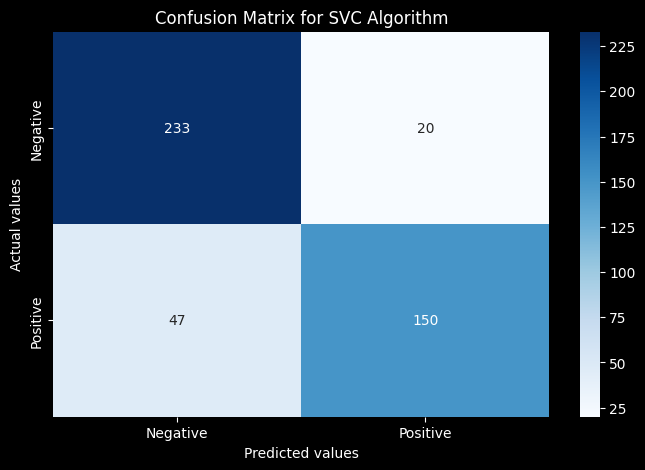

In [26]:
### Check model
CM = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix is : \n', CM)
plt.figure(figsize=(8,5))
sns.heatmap(data=CM, annot=True,fmt='g', cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title(f'Confusion Matrix for {best_model_name} Algorithm')
plt.show()

In [27]:
ClassificationReport = classification_report(y_test,y_test_pred,target_names=['Negative', 'Positive'])
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

    Negative       0.83      0.92      0.87       253
    Positive       0.88      0.76      0.82       197

    accuracy                           0.85       450
   macro avg       0.86      0.84      0.85       450
weighted avg       0.85      0.85      0.85       450



**<a id="6"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Like this? Upvote and comment! 🌊 End</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>